In [219]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [220]:
# Load the data
data_path = "data/data.xlsm"
sheet_name = "mimic3d"
df = pd.read_excel(data_path, sheet_name=sheet_name)

c:\Users\pecko\anaconda3\envs\data-analytics\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Web Extension extension is not supported and will be removed
  for idx, row in parser.parse():


In [221]:
df

,hadm_id,gender,Gender,age,Age group,age.1,Adult,Teen,Middle Age,Child,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,1,35,Adult,1,1,0,0,0,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,M,0,59,Senior,4,0,0,0,0,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,F,1,48,Middle Age,3,0,0,1,0,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,F,1,73,Senior,4,0,0,0,0,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,M,0,60,Senior,4,0,0,0,0,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,M,0,60,Senior,4,0,0,0,0,...,0.20,0.13,23.11,8.01,0.00,0.08,1315.46,0,1746.31,3
58972,199994,F,1,58,Senior,4,0,0,0,0,...,2.26,0.30,7.90,0.00,0.00,0.31,674.05,0,834.98,2
58973,199995,M,0,23,Adult,1,1,0,0,0,...,0.54,0.10,6.27,5.79,0.00,0.36,207.10,0,261.30,3
58974,199998,M,0,69,Senior,4,0,0,0,0,...,0.17,0.35,12.24,17.69,0.00,1.02,426.87,0,537.42,1


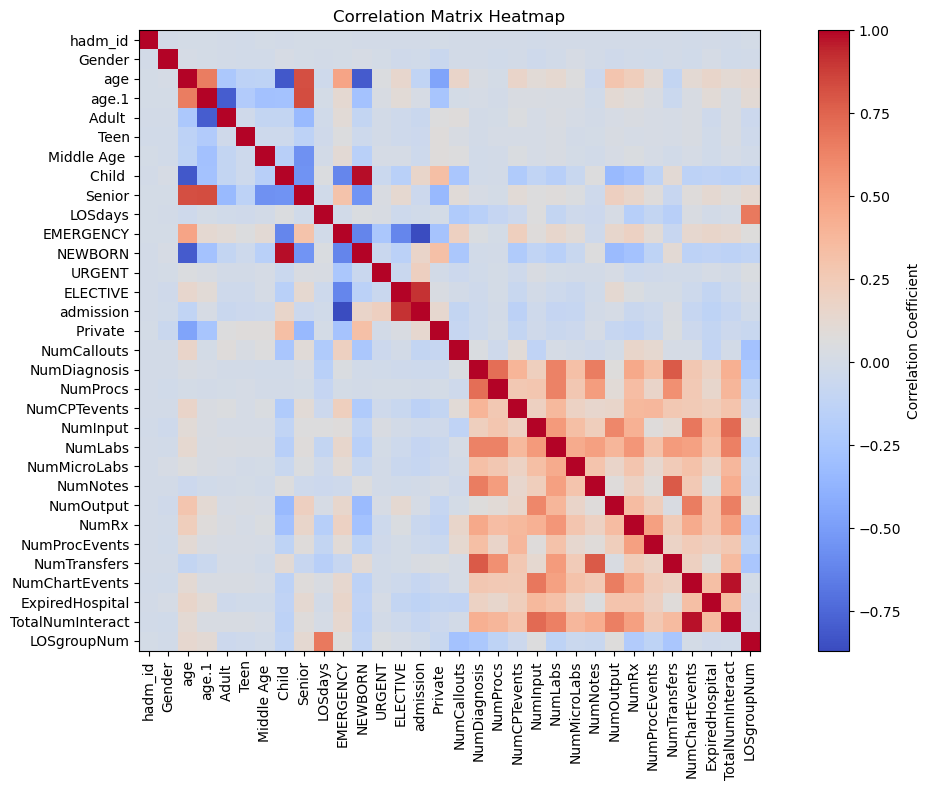

In [222]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64', 'boolean'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Optional: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

In [223]:
# 1. One-Hot Encoding for Nominal Categorical Variables
one_hot_columns = ["admit_type"]
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True, dtype=int)

In [224]:
df

,hadm_id,gender,Gender,age,Age group,age.1,Adult,Teen,Middle Age,Child,...,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum,admit_type_EMERGENCY,admit_type_NEWBORN,admit_type_URGENT
0,100001,F,1,35,Adult,1,1,0,0,0,...,14.91,1.13,0.65,398.70,0,493.89,1,1,0,0
1,100003,M,0,59,Senior,4,0,0,0,0,...,7.18,0.99,1.24,373.02,0,465.71,1,1,0,0
2,100006,F,1,48,Middle Age,3,0,0,1,0,...,6.23,0.00,0.33,286.21,0,344.00,3,1,0,0
3,100007,F,1,73,Senior,4,0,0,0,0,...,11.52,0.00,0.96,526.06,0,603.05,1,1,0,0
4,100009,M,0,60,Senior,4,0,0,0,0,...,25.00,2.87,2.05,554.92,0,679.84,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,M,0,60,Senior,4,0,0,0,0,...,8.01,0.00,0.08,1315.46,0,1746.31,3,1,0,0
58972,199994,F,1,58,Senior,4,0,0,0,0,...,0.00,0.00,0.31,674.05,0,834.98,2,1,0,0
58973,199995,M,0,23,Adult,1,1,0,0,0,...,5.79,0.00,0.36,207.10,0,261.30,3,1,0,0
58974,199998,M,0,69,Senior,4,0,0,0,0,...,17.69,0.00,1.02,426.87,0,537.42,1,1,0,0


In [225]:
# Select features and target column
features = [
    "gender", "age", "Adult", "Teen", "Middle Age", "Child", "Senior", 
    "admit_type", "EMERGENCY", "NEWBORN", "URGENT", "ELECTIVE", "insurance", 
    "NumCallouts", "NumDiagnosis", "NumProcs", "NumCPTevents", "NumInput", 
    "NumLabs", "NumMicroLabs", "NumNotes", "NumOutput", "NumRx", "NumProcEvents", 
    "NumTransfers", "NumChartEvents", "TotalNumInteract"
]

features = ["Adult ", "Teen", "Middle Age ", "Child ", "admit_type_EMERGENCY", "admit_type_NEWBORN", "admit_type_URGENT"]

target = ["LOSdays"]

# Encode categorical features
#categorical_columns = ["gender", "admit_type", "insurance"]
#df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Ensure all features exist after encoding
#encoded_features = [col for col in df.columns if col in features]

# Extract features (X) and target (y)
X = df[features]
y = df[target]

In [226]:
X

,Adult,Teen,Middle Age,Child,admit_type_EMERGENCY,admit_type_NEWBORN,admit_type_URGENT
0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
58971,0,0,0,0,1,0,0
58972,0,0,0,0,1,0,0
58973,1,0,0,0,1,0,0
58974,0,0,0,0,1,0,0


In [227]:
y

,LOSdays
0,6.17
1,4.04
2,12.04
3,7.29
4,4.88
...,...
58971,24.58
58972,9.75
58973,16.75
58974,5.88


In [228]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [229]:
X_train

,Adult,Teen,Middle Age,Child,admit_type_EMERGENCY,admit_type_NEWBORN,admit_type_URGENT
3203,1,0,0,0,1,0,0
50221,0,0,0,0,1,0,0
35723,0,0,0,0,1,0,0
24784,0,0,0,0,1,0,0
32544,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
23028,0,0,0,0,0,0,0
7191,0,0,0,0,1,0,0
53539,0,0,0,0,1,0,0
14962,0,0,0,0,1,0,0


In [230]:
y_train

,LOSdays
3203,2.58
50221,9.54
35723,3.08
24784,7.83
32544,24.96
...,...
23028,6.25
7191,34.79
53539,3.13
14962,18.75


In [231]:
# Standardize the features
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim).to(device)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Move data to GPU if available
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)


cuda


In [232]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [10/1000], Loss: 212.9538
Epoch [20/1000], Loss: 187.1538
Epoch [30/1000], Loss: 173.6841
Epoch [40/1000], Loss: 166.5908
Epoch [50/1000], Loss: 162.8023
Epoch [60/1000], Loss: 160.7326
Epoch [70/1000], Loss: 159.5624
Epoch [80/1000], Loss: 158.8675
Epoch [90/1000], Loss: 158.4279
Epoch [100/1000], Loss: 158.1289
Epoch [110/1000], Loss: 157.9104
Epoch [120/1000], Loss: 157.7403
Epoch [130/1000], Loss: 157.6013
Epoch [140/1000], Loss: 157.4838
Epoch [150/1000], Loss: 157.3821
Epoch [160/1000], Loss: 157.2927
Epoch [170/1000], Loss: 157.2135
Epoch [180/1000], Loss: 157.1427
Epoch [190/1000], Loss: 157.0791
Epoch [200/1000], Loss: 157.0218
Epoch [210/1000], Loss: 156.9700
Epoch [220/1000], Loss: 156.9231
Epoch [230/1000], Loss: 156.8804
Epoch [240/1000], Loss: 156.8414
Epoch [250/1000], Loss: 156.8058
Epoch [260/1000], Loss: 156.7731
Epoch [270/1000], Loss: 156.7431
Epoch [280/1000], Loss: 156.7153
Epoch [290/1000], Loss: 156.6897
Epoch [300/1000], Loss: 156.6658
Epoch [310/1000], L

In [233]:
# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")

    # Calculate R2 score
    predictions_np = predictions.cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()
    r2 = r2_score(y_test_np, predictions_np)
    print(f"R2 Score: {r2:.4f}")

Test Loss: 148.7611
R2 Score: 0.0000


In [258]:
print("Feature coefficients")
ws = [w[0] for w in model.parameters()][0].cpu().detach().numpy()
[ f"{name}: {w}" for name, w in zip(features, ws)]

Feature coefficients


['Adult : -0.4339502453804016',
 'Teen: -0.2580980658531189',
 'Middle Age : 0.33230191469192505',
 'Child : 1.9800186157226562',
 'admit_type_EMERGENCY: 1.682471513748169',
 'admit_type_NEWBORN: 1.5354241132736206',
 'admit_type_URGENT: 1.5651321411132812']